In [ ]:
import pandas as pd
import scipy
from scipy.signal import butter, lfilter, filtfilt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
b1, a1 = butter(1, 20, 'low', fs=1000)
print(b1)
print(a1)

[0.0591907 0.0591907]
[ 1.         -0.88161859]


In [ ]:
b2, a2 = butter(1, 10, 'low', fs=1000)
print(b2)
print(a2)

[0.03046875 0.03046875]
[ 1.         -0.93906251]


In [ ]:
b3, a3 = butter(2, 30, 'low', fs=1000)
print(b3)
print(a3)

[0.00782021 0.01564042 0.00782021]
[ 1.         -1.73472577  0.7660066 ]


In [ ]:
b4, a4 = butter(2, 25, 'low', fs=1000)
print(b4)
print(a4)

[0.00554272 0.01108543 0.00554272]
[ 1.         -1.77863178  0.80080265]


In [ ]:
data_maju = pd.read_csv('/content/horizontal_maju.csv', delimiter=';')
df = pd.DataFrame(data_maju)
df.head()

,PWM,RPM B,RPM D,Waktu
0,1.0,0.153945,0.000000,36
1,1.0,47.847412,70.568405,29295
2,1.0,53.764854,74.828804,65756
3,1.0,198.143600,200.186340,102216
4,1.0,259.484283,225.791565,141799


In [ ]:
df.columns

Index(['PWM', 'RPM B', ' RPM D', ' Waktu'], dtype='object')

In [ ]:
detik = []
for i in range (0, len(df[' Waktu'])):
  ambil = df[' Waktu'].iloc[i]/1000000
  detik.append(ambil)

df['Detik'] = detik
df

,PWM,RPM B,RPM D,Waktu,Detik
0,1.0,0.153945,0.000000,36,0.000036
1,1.0,47.847412,70.568405,29295,0.029295
2,1.0,53.764854,74.828804,65756,0.065756
3,1.0,198.143600,200.186340,102216,0.102216
4,1.0,259.484283,225.791565,141799,0.141799
...,...,...,...,...,...
95,1.0,257.193024,266.609680,3815758,3.815758
96,1.0,251.638092,261.816742,3856383,3.856383
97,1.0,266.609680,258.907684,3897008,3.897008
98,1.0,256.626526,257.193024,3937633,3.937633


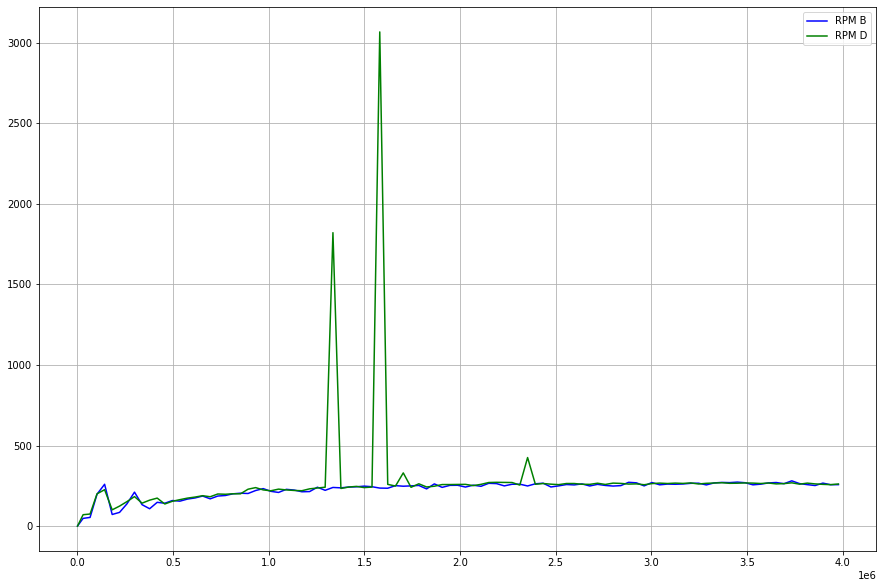

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(visible=True)
plt.plot(df[' Waktu'], df['RPM B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], df[' RPM D'], label='RPM D', color='g')
plt.legend()

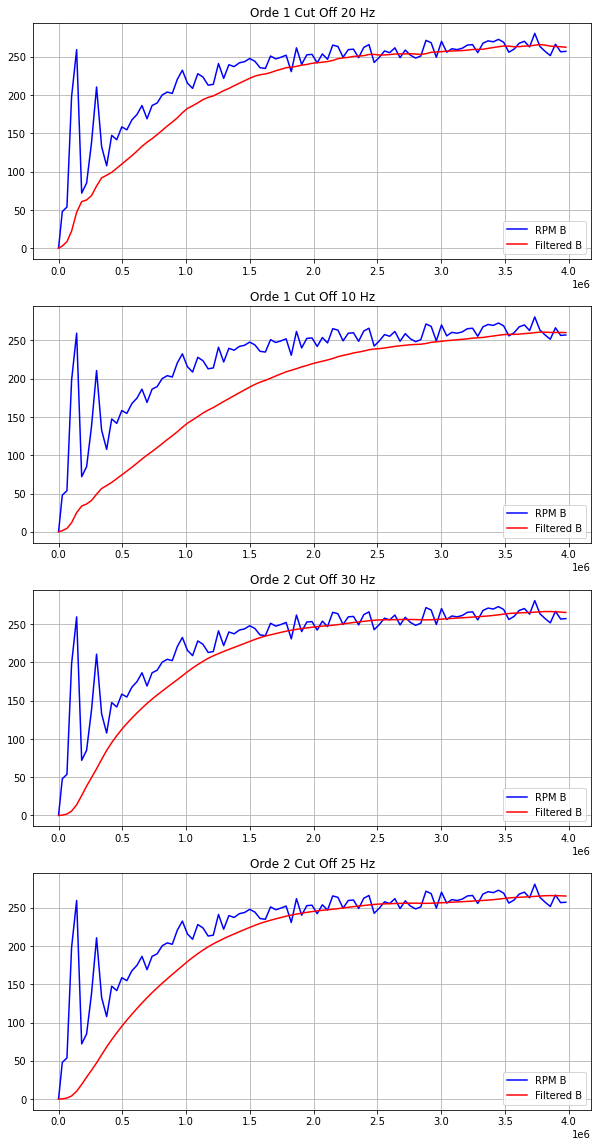

In [ ]:
plt.figure(figsize=(10,20))
plt.grid(visible=True)
horizontal_filter1 = lfilter(b1, a1, df['RPM B'])
horizontal_filter2 = lfilter(b2, a2, df['RPM B'])
horizontal_filter3 = lfilter(b3, a3, df['RPM B'])
horizontal_filter4 = lfilter(b4, a4, df['RPM B'])
plt.subplot(4, 1, 1)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 20 Hz")
plt.plot(df[' Waktu'], df['RPM B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], horizontal_filter1, label='Filtered B', color='r')
plt.legend()

plt.subplot(4, 1, 2)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 10 Hz")
plt.plot(df[' Waktu'], df['RPM B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], horizontal_filter2, label='Filtered B', color='r')
plt.legend()

plt.subplot(4, 1, 3)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 30 Hz")
plt.plot(df[' Waktu'], df['RPM B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], horizontal_filter3, label='Filtered B', color='r')
plt.legend()

plt.subplot(4, 1, 4)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 25 Hz")
plt.plot(df[' Waktu'], df['RPM B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], horizontal_filter4, label='Filtered B', color='r')
plt.legend()

In [ ]:
df['Filtered B'] = horizontal_filter3
df

,PWM,RPM B,RPM D,Waktu,Detik,Filtered B
0,1.0,0.153945,0.000000,36,0.000036,0.001204
1,1.0,47.847412,70.568405,29295,0.029295,0.378673
2,1.0,53.764854,74.828804,65756,0.065756,1.825981
3,1.0,198.143600,200.186340,102216,0.102216,5.642116
4,1.0,259.484283,225.791565,141799,0.141799,13.937532
...,...,...,...,...,...,...
95,1.0,257.193024,266.609680,3815758,3.815758,266.431933
96,1.0,251.638092,261.816742,3856383,3.856383,266.434937
97,1.0,266.609680,258.907684,3897008,3.897008,266.134902
98,1.0,256.626526,257.193024,3937633,3.937633,265.724774


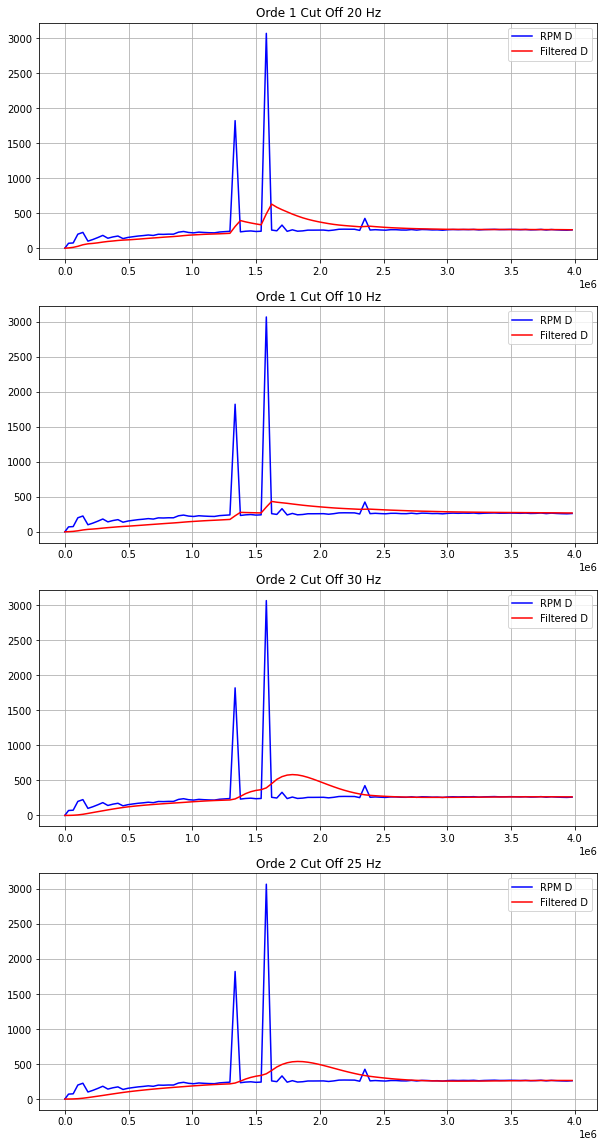

In [ ]:
plt.figure(figsize=(10,20))
plt.grid(visible=True)
horizontal_filter1 = lfilter(b1, a1, df[' RPM D'])
horizontal_filter2 = lfilter(b2, a2, df[' RPM D'])
horizontal_filter3 = lfilter(b3, a3, df[' RPM D'])
horizontal_filter4 = lfilter(b4, a4, df[' RPM D'])

plt.subplot(4, 1, 1)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 20 Hz")
plt.plot(df[' Waktu'], df[' RPM D'], label='RPM D', color='b')
plt.plot(df[' Waktu'], horizontal_filter1, label='Filtered D', color='r')
plt.legend()

plt.subplot(4, 1, 2)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 10 Hz")
plt.plot(df[' Waktu'], df[' RPM D'], label='RPM D', color='b')
plt.plot(df[' Waktu'], horizontal_filter2, label='Filtered D', color='r')
plt.legend()

plt.subplot(4, 1, 3)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 30 Hz")
plt.plot(df[' Waktu'], df[' RPM D'], label='RPM D', color='b')
plt.plot(df[' Waktu'], horizontal_filter3, label='Filtered D', color='r')
plt.legend()

plt.subplot(4, 1, 4)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 25 Hz")
plt.plot(df[' Waktu'], df[' RPM D'], label='RPM D', color='b')
plt.plot(df[' Waktu'], horizontal_filter4, label='Filtered D', color='r')
plt.legend()

In [ ]:
df['FIltered D'] = horizontal_filter3
df

,PWM,RPM B,RPM D,Waktu,Detik,Filtered B,FIltered D
0,1.0,0.153945,0.000000,36,0.000036,0.001204,0.000000
1,1.0,47.847412,70.568405,29295,0.029295,0.378673,0.551860
2,1.0,53.764854,74.828804,65756,0.065756,1.825981,2.646221
3,1.0,198.143600,200.186340,102216,0.102216,5.642116,7.455452
4,1.0,259.484283,225.791565,141799,0.141799,13.937532,16.388053
...,...,...,...,...,...,...,...
95,1.0,257.193024,266.609680,3815758,3.815758,266.431933,265.891171
96,1.0,251.638092,261.816742,3856383,3.856383,266.434937,265.768129
97,1.0,266.609680,258.907684,3897008,3.897008,266.134902,265.565007
98,1.0,256.626526,257.193024,3937633,3.937633,265.724774,265.210509


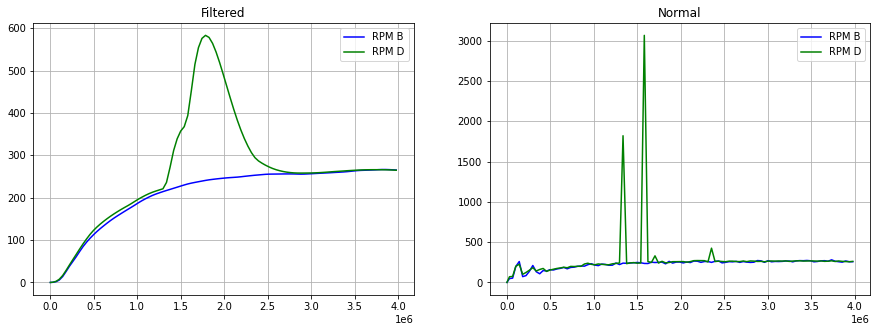

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.grid(visible=True)
plt.title('Filtered')
plt.plot(df[' Waktu'], df['Filtered B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], df['FIltered D'], label='RPM D', color='g')
plt.legend()

plt.subplot(1, 2, 2)
plt.grid(visible=True)
plt.title('Normal')
plt.plot(df[' Waktu'], df['RPM B'], label='RPM B', color='b')
plt.plot(df[' Waktu'], df[' RPM D'], label='RPM D', color='g')
plt.legend()

In [ ]:
data_vertikal = pd.read_csv('/content/vertikal_kanan.csv', delimiter=';')
df2 = pd.DataFrame(data_vertikal)

detik2 = []

for i in range (0, len(df2['Waktu'])):
  ambil = df2['Waktu'].iloc[i]/1000000
  detik2.append(ambil)

df2['Detik'] = detik2
df2.head()

,PWM,RPM A,RPM C,Waktu,Detik
0,1.0,0.000000,0.000000,36,0.000036
1,1.0,39.070568,57.964405,29295,0.029295
2,1.0,69.933037,126.364906,65756,0.065756
3,1.0,178.693924,210.684357,103267,0.103267
4,1.0,143.306824,182.901810,142842,0.142842


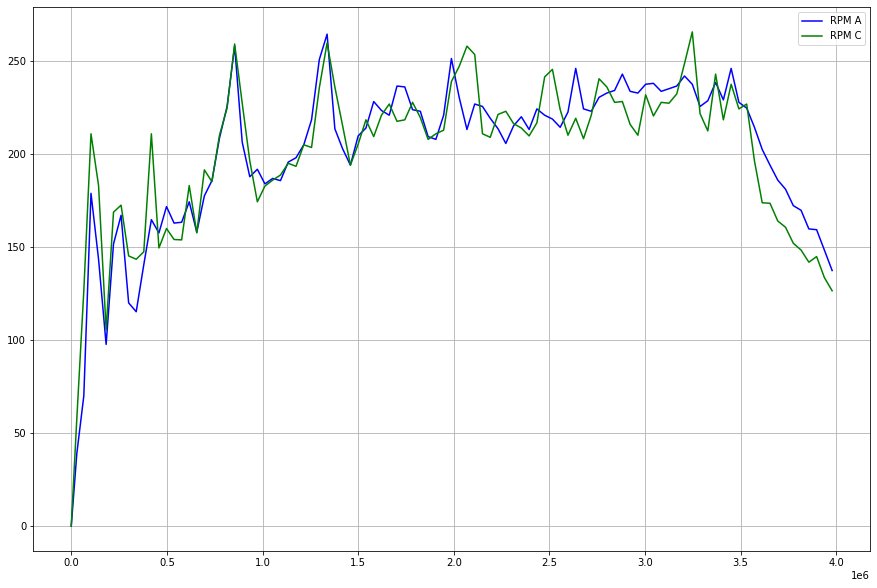

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(visible=True)
plt.plot(df2['Waktu'], df2['RPM A'], label='RPM A', color='b')
plt.plot(df2['Waktu'], df2['RPM C'], label='RPM C', color='g')
plt.legend()

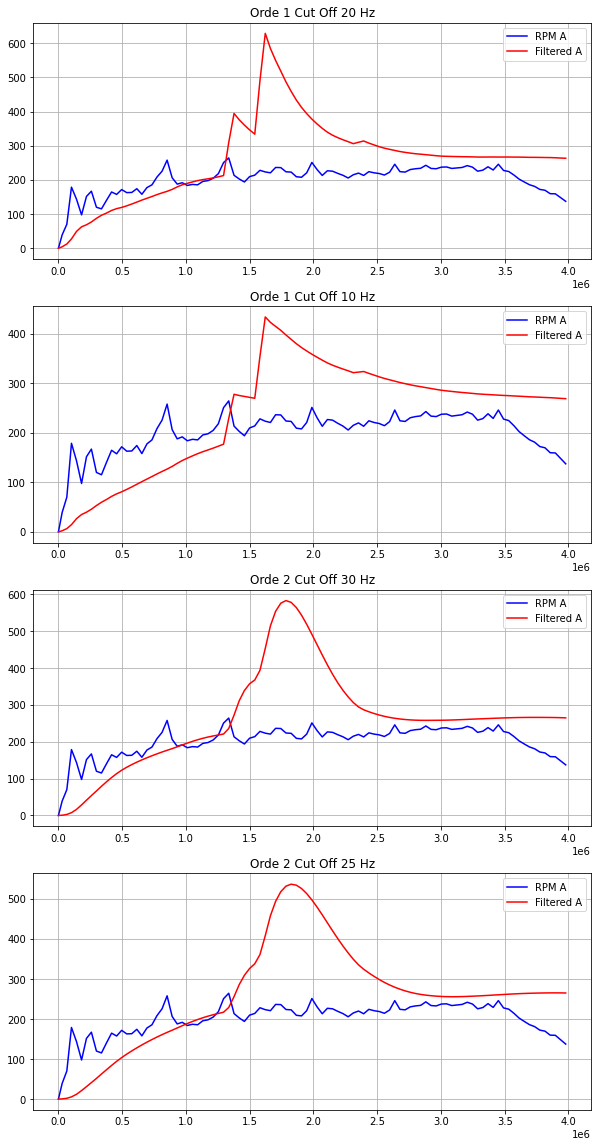

In [ ]:
plt.figure(figsize=(10,20))
plt.grid(visible=True)
vertikal_filter1 = lfilter(b1, a1, df2['RPM A'])
vertikal_filter2 = lfilter(b2, a2, df2['RPM A'])
vertikal_filter3 = lfilter(b3, a3, df2['RPM A'])
vertikal_filter4 = lfilter(b4, a4, df2['RPM A'])

plt.subplot(4, 1, 1)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 20 Hz")
plt.plot(df[' Waktu'], df2['RPM A'], label='RPM A', color='b')
plt.plot(df[' Waktu'], horizontal_filter1, label='Filtered A', color='r')
plt.legend()

plt.subplot(4, 1, 2)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 10 Hz")
plt.plot(df[' Waktu'], df2['RPM A'], label='RPM A', color='b')
plt.plot(df[' Waktu'], horizontal_filter2, label='Filtered A', color='r')
plt.legend()

plt.subplot(4, 1, 3)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 30 Hz")
plt.plot(df[' Waktu'], df2['RPM A'], label='RPM A', color='b')
plt.plot(df[' Waktu'], horizontal_filter3, label='Filtered A', color='r')
plt.legend()

plt.subplot(4, 1, 4)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 25 Hz")
plt.plot(df[' Waktu'], df2['RPM A'], label='RPM A', color='b')
plt.plot(df[' Waktu'], horizontal_filter4, label='Filtered A', color='r')
plt.legend()

In [ ]:
df2['Filtered A'] = vertikal_filter3

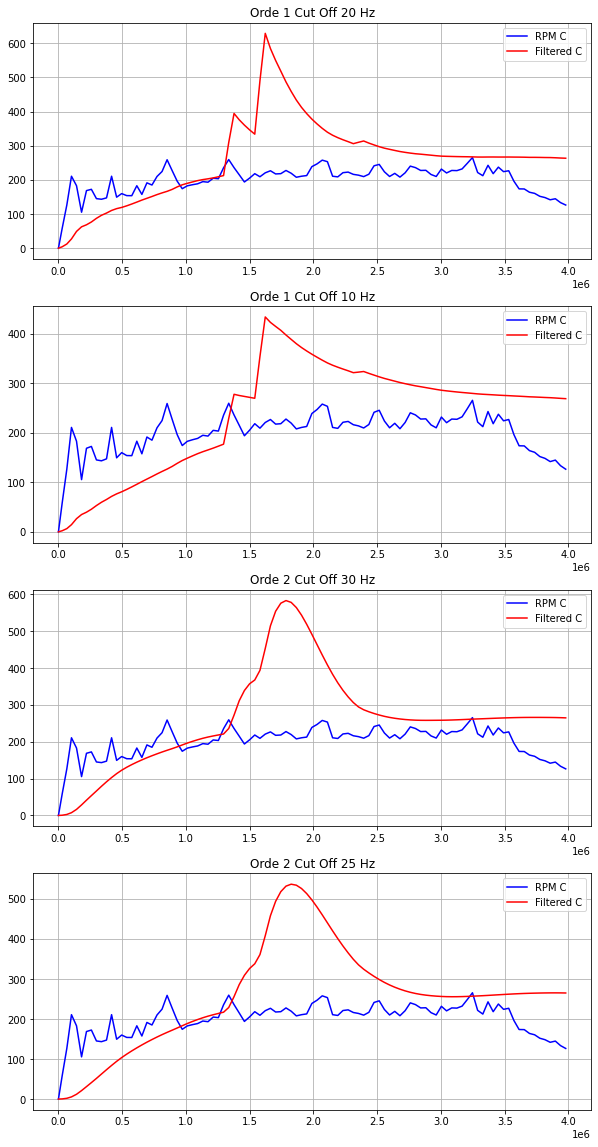

In [ ]:
plt.figure(figsize=(10,20))
plt.grid(visible=True)
vertikal_filter1 = lfilter(b1, a1, df2['RPM C'])
vertikal_filter2 = lfilter(b2, a2, df2['RPM C'])
vertikal_filter3 = lfilter(b3, a3, df2['RPM C'])
vertikal_filter4 = lfilter(b4, a4, df2['RPM C'])

plt.subplot(4, 1, 1)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 20 Hz")
plt.plot(df[' Waktu'], df2['RPM C'], label='RPM C', color='b')
plt.plot(df[' Waktu'], horizontal_filter1, label='Filtered C', color='r')
plt.legend()

plt.subplot(4, 1, 2)
plt.grid(visible=True)
plt.title("Orde 1 Cut Off 10 Hz")
plt.plot(df[' Waktu'], df2['RPM C'], label='RPM C', color='b')
plt.plot(df[' Waktu'], horizontal_filter2, label='Filtered C', color='r')
plt.legend()

plt.subplot(4, 1, 3)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 30 Hz")
plt.plot(df[' Waktu'], df2['RPM C'], label='RPM C', color='b')
plt.plot(df[' Waktu'], horizontal_filter3, label='Filtered C', color='r')
plt.legend()

plt.subplot(4, 1, 4)
plt.grid(visible=True)
plt.title("Orde 2 Cut Off 25 Hz")
plt.plot(df[' Waktu'], df2['RPM C'], label='RPM C', color='b')
plt.plot(df[' Waktu'], horizontal_filter4, label='Filtered C', color='r')
plt.legend()

In [ ]:
df2['Filtered C'] = vertikal_filter3
df2

,PWM,RPM A,RPM C,Waktu,Detik,Filtered A,Filtered C
0,1.0,0.000000,0.000000,36,0.000036,0.000000,0.000000
1,1.0,39.070568,57.964405,29295,0.029295,0.305540,0.453294
2,1.0,69.933037,126.364906,65756,0.065756,1.687999,2.681128
3,1.0,178.693924,210.684357,103267,0.103267,5.490915,8.381084
4,1.0,143.306824,182.901810,142842,0.142842,12.694641,18.198842
...,...,...,...,...,...,...,...
95,1.0,169.590164,148.229568,3815758,3.815758,217.830356,207.150450
96,1.0,159.600601,141.737762,3856383,3.856383,212.778277,200.684822
97,1.0,159.164551,144.730988,3897009,3.897009,207.319620,193.962371
98,1.0,148.229568,133.457565,3937633,3.937633,201.549818,187.161362


In [ ]:
df2.columns

Index(['PWM', 'RPM A', 'RPM C', 'Waktu', 'Detik', 'Filtered A', 'Filtered C'], dtype='object')

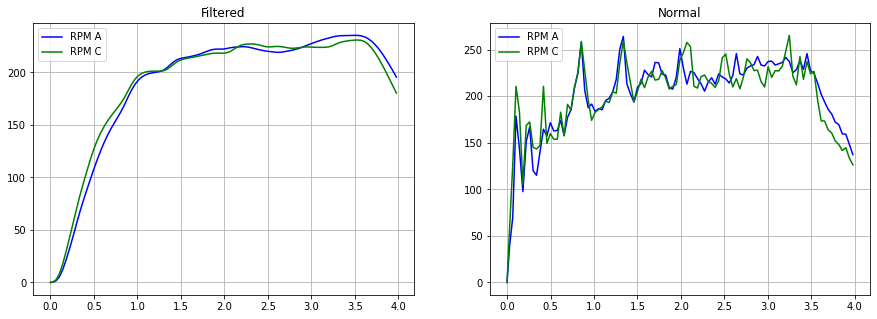

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.grid(visible=True)
plt.title('Filtered')
plt.plot(df2['Detik'], df2['Filtered A'], label='RPM A', color='b')
plt.plot(df2['Detik'], df2['Filtered C'], label='RPM C', color='g')
plt.legend()

plt.subplot(1, 2, 2)
plt.grid(visible=True)
plt.title('Normal')
plt.plot(df2['Detik'], df2['RPM A'], label='RPM A', color='b')
plt.plot(df2['Detik'], df2['RPM C'], label='RPM C', color='g')
plt.legend()

In [ ]:
df.to_csv('/content/New_Data_Horizontal_R2.csv', index=False)
df2.to_csv('/content/New_Data_Vertikal_R2.csv', index=False)

In [ ]:
data_kiri = pd.read_csv('/content/data_kiri.csv', delimiter=';')

In [ ]:
df_kiri = pd.DataFrame(data_kiri)
df_kiri

,PWM,RPM A,RPM C,Waktu
0,1.0,229.573303,0.027729,36
1,1.0,49.641430,80.572922,31389
2,1.0,94.110214,129.310150,67841
3,1.0,190.997437,186.115723,105341
4,1.0,209.925125,163.865601,144933
...,...,...,...,...
95,1.0,204.400772,239.729309,3818892
96,1.0,192.258163,192.894775,3859507
97,1.0,194.504913,174.675339,3900132
98,1.0,147.292603,109.090302,3940757


In [ ]:
detik2 = []
for i in range (0, len(df_kiri['Waktu'])):
  ambil = df_kiri['Waktu'].iloc[i]/1000000
  detik2.append(ambil)

df_kiri['Detik'] = detik2
df_kiri.head()

,PWM,RPM A,RPM C,Waktu,Detik
0,1.0,229.573303,0.027729,36,0.000036
1,1.0,49.641430,80.572922,31389,0.031389
2,1.0,94.110214,129.310150,67841,0.067841
3,1.0,190.997437,186.115723,105341,0.105341
4,1.0,209.925125,163.865601,144933,0.144933


In [ ]:
filteredA2 = lfilter(b3, a3, df_kiri['RPM A'])
df_kiri['Filtered A'] = filteredA2
df_kiri.head()

,PWM,RPM A,RPM C,Waktu,Detik,Filtered A,Filtered C
0,1.0,229.573303,0.027729,36,0.000036,1.795311,0.000154
1,1.0,49.641430,80.572922,31389,0.031389,7.093201,0.447174
2,1.0,94.110214,129.310150,67841,0.067841,14.237223,2.405303
3,1.0,190.997437,186.115723,105341,0.105341,22.618008,6.831690
4,1.0,209.925125,163.865601,144933,0.144933,33.695133,13.913052


In [ ]:
filteredC2 = lfilter(b3, a3, df_kiri['RPM C'])
df_kiri['Filtered C'] = filteredC2
df_kiri.head()

,PWM,RPM A,RPM C,Waktu,Detik,Filtered A,Filtered C
0,1.0,229.573303,0.027729,36,0.000036,1.795311,0.000217
1,1.0,49.641430,80.572922,31389,0.031389,7.093201,0.630907
2,1.0,94.110214,129.310150,67841,0.067841,14.237223,3.365927
3,1.0,190.997437,186.115723,105341,0.105341,22.618008,9.463707
4,1.0,209.925125,163.865601,144933,0.144933,33.695133,19.042237


In [ ]:
df_kiri.to_csv('/content/Data_Left.csv', index=False)

In [ ]:
data_mundur = pd.read_csv('/content/data_mundur.csv', delimiter=';')
df_mundur = pd.DataFrame(data_mundur)
df_mundur

,PWM,RPM B,RPM D,Waktu
0,1.0,0.031105,0.031106,36
1,1.0,49.097530,69.021591,29296
2,1.0,48.545185,106.400406,65757
3,1.0,198.819870,204.400772,103257
4,1.0,260.645294,216.961731,142850
...,...,...,...,...
95,1.0,233.952682,237.772324,3815762
96,1.0,239.729309,241.218307,3856383
97,1.0,224.919769,244.765656,3897017
98,1.0,247.890305,243.741501,3937632


In [ ]:
filteredB2 = lfilter(b3, a3, df_mundur['RPM B'])
df_mundur['Filtered B'] = filteredB2
df_mundur

,PWM,RPM B,RPM D,Waktu,Filtered B
0,1.0,0.031105,0.031106,36,0.000243
1,1.0,49.097530,69.021591,29296,0.384861
2,1.0,48.545185,106.400406,65757,1.815225
3,1.0,198.819870,204.400772,103257,5.552144
4,1.0,260.645294,216.961731,142850,13.768532
...,...,...,...,...,...
95,1.0,233.952682,237.772324,3815762,227.070306
96,1.0,239.729309,241.218307,3856383,227.406774
97,1.0,224.919769,244.765656,3897017,227.888982
98,1.0,247.890305,243.741501,3937632,228.460925


In [ ]:
filteredD2 = lfilter(b3, a3, df_mundur['RPM D'])
df_mundur['Filtered D'] = filteredD2
df_mundur

,PWM,RPM B,RPM D,Waktu,Filtered B,Filtered D
0,1.0,0.031105,0.031106,36,0.000243,0.000243
1,1.0,49.097530,69.021591,29296,0.384861,0.540672
2,1.0,48.545185,106.400406,65757,1.815225,2.849574
3,1.0,198.819870,204.400772,103257,5.552144,8.331437
4,1.0,260.645294,216.961731,142850,13.768532,17.995639
...,...,...,...,...,...,...
95,1.0,233.952682,237.772324,3815762,227.070306,234.211792
96,1.0,239.729309,241.218307,3856383,227.406774,234.416507
97,1.0,224.919769,244.765656,3897017,227.888982,234.786878
98,1.0,247.890305,243.741501,3937632,228.460925,235.346979


In [ ]:
df_mundur.to_csv('/content/Data_Backward.csv', index=False)

In [1]:
import pandas as pd
import scipy
from scipy.signal import butter, lfilter, filtfilt
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
b, a = butter(2, 30, 'low', fs=1000)
print(b)
print(a)

[0.00782021 0.01564042 0.00782021]
[ 1.         -1.73472577  0.7660066 ]


In [4]:
data = pd.read_csv('/content/data_mundur.csv', delimiter=';')
df = pd.DataFrame(data)
df.head()

,PWM,RPM B,RPM D,Waktu
0,1.0,0.031105,0.031106,36
1,1.0,49.097530,69.021591,29296
2,1.0,48.545185,106.400406,65757
3,1.0,198.819870,204.400772,103257
4,1.0,260.645294,216.961731,142850


In [6]:
filteredB = lfilter(b, a, df['RPM B'])
df['Filtered B'] = filteredB
df

,PWM,RPM B,RPM D,Waktu,Filtered B
0,1.0,0.031105,0.031106,36,0.000243
1,1.0,49.097530,69.021591,29296,0.384861
2,1.0,48.545185,106.400406,65757,1.815225
3,1.0,198.819870,204.400772,103257,5.552144
4,1.0,260.645294,216.961731,142850,13.768532
...,...,...,...,...,...
95,1.0,233.952682,237.772324,3815762,227.070306
96,1.0,239.729309,241.218307,3856383,227.406774
97,1.0,224.919769,244.765656,3897017,227.888982
98,1.0,247.890305,243.741501,3937632,228.460925


In [7]:
filteredD = lfilter(b, a, df['RPM D'])
df['Filtered D'] = filteredD
df

,PWM,RPM B,RPM D,Waktu,Filtered B,Filtered D
0,1.0,0.031105,0.031106,36,0.000243,0.000243
1,1.0,49.097530,69.021591,29296,0.384861,0.540672
2,1.0,48.545185,106.400406,65757,1.815225,2.849574
3,1.0,198.819870,204.400772,103257,5.552144,8.331437
4,1.0,260.645294,216.961731,142850,13.768532,17.995639
...,...,...,...,...,...,...
95,1.0,233.952682,237.772324,3815762,227.070306,234.211792
96,1.0,239.729309,241.218307,3856383,227.406774,234.416507
97,1.0,224.919769,244.765656,3897017,227.888982,234.786878
98,1.0,247.890305,243.741501,3937632,228.460925,235.346979


In [8]:
df.to_csv('/content/mundur_baru.csv', index=False)

In [9]:
data_kiri = pd.read_csv('/content/data_kiri.csv', delimiter=';')
df_kiri = pd.DataFrame(data_kiri)
df_kiri

,PWM,RPM A,RPM C,Waktu
0,1.0,229.573303,0.027729,36
1,1.0,49.641430,80.572922,31389
2,1.0,94.110214,129.310150,67841
3,1.0,190.997437,186.115723,105341
4,1.0,209.925125,163.865601,144933
...,...,...,...,...
95,1.0,204.400772,239.729309,3818892
96,1.0,192.258163,192.894775,3859507
97,1.0,194.504913,174.675339,3900132
98,1.0,147.292603,109.090302,3940757


In [24]:
b_kiri, a_kiri = butter(2, 25, 'low', fs=1000)
print(b_kiri)
print(a_kiri)

[0.00554272 0.01108543 0.00554272]
[ 1.         -1.77863178  0.80080265]


In [16]:
aKiriFilter = lfilter(b_kiri, a_kiri, df_kiri['RPM A'])
df_kiri['Filtered A'] = aKiriFilter
df_kiri

,PWM,RPM A,RPM C,Waktu,Filtered A
0,1.0,229.573303,0.027729,36,1.272460
1,1.0,49.641430,80.572922,31389,5.083306
2,1.0,94.110214,129.310150,67841,10.366723
3,1.0,190.997437,186.115723,105341,16.744904
4,1.0,209.925125,163.865601,144933,25.283791
...,...,...,...,...,...
95,1.0,204.400772,239.729309,3818892,226.724142
96,1.0,192.258163,192.894775,3859507,225.707687
97,1.0,194.504913,174.675339,3900132,224.231859
98,1.0,147.292603,109.090302,3940757,222.116801


In [17]:
cKiriFilter = lfilter(b_kiri, a_kiri, df_kiri['RPM C'])
df_kiri['Filtered C'] = cKiriFilter
df_kiri

,PWM,RPM A,RPM C,Waktu,Filtered A,Filtered C
0,1.0,229.573303,0.027729,36,1.272460,0.000154
1,1.0,49.641430,80.572922,31389,5.083306,0.447174
2,1.0,94.110214,129.310150,67841,10.366723,2.405303
3,1.0,190.997437,186.115723,105341,16.744904,6.831690
4,1.0,209.925125,163.865601,144933,25.283791,13.913052
...,...,...,...,...,...,...
95,1.0,204.400772,239.729309,3818892,226.724142,229.242451
96,1.0,192.258163,192.894775,3859507,225.707687,230.356933
97,1.0,194.504913,174.675339,3900132,224.231859,230.577450
98,1.0,147.292603,109.090302,3940757,222.116801,229.252108


In [18]:
df_kiri.to_csv('/content/kiri_baru.csv', index=False)

In [20]:
data_kanan = pd.read_csv('/content/data_kanan.csv', delimiter=';')
df_kanan = pd.DataFrame(data_kanan)
df_kanan

,PWM,RPM A,RPM C,Waktu
0,1.0,0.000000,0.000000,36
1,1.0,39.070568,57.964405,29295
2,1.0,69.933037,126.364906,65756
3,1.0,178.693924,210.684357,103267
4,1.0,143.306824,182.901810,142842
...,...,...,...,...
95,1.0,169.590164,148.229568,3815758
96,1.0,159.600601,141.737762,3856383
97,1.0,159.164551,144.730988,3897009
98,1.0,148.229568,133.457565,3937633


In [21]:
aKananFilter = lfilter(b_kiri, a_kiri, df_kanan['RPM A'])
df_kanan['Filtered A'] = aKananFilter
df_kanan

,PWM,RPM A,RPM C,Waktu,Filtered A
0,1.0,0.000000,0.000000,36,0.000000
1,1.0,39.070568,57.964405,29295,0.216557
2,1.0,69.933037,126.364906,65756,1.205909
3,1.0,178.693924,210.684357,103267,3.953693
4,1.0,143.306824,182.901810,142842,9.229297
...,...,...,...,...,...
95,1.0,169.590164,148.229568,3815758,222.056293
96,1.0,159.600601,141.737762,3856383,218.003470
97,1.0,159.164551,144.730988,3897009,213.516068
98,1.0,148.229568,133.457565,3937633,208.659332


In [22]:
cKananFilter = lfilter(b_kiri, a_kiri, df_kanan['RPM C'])
df_kanan['Filtered C'] = cKananFilter
df_kanan

,PWM,RPM A,RPM C,Waktu,Filtered A,Filtered C
0,1.0,0.000000,0.000000,36,0.000000,0.000000
1,1.0,39.070568,57.964405,29295,0.216557,0.321280
2,1.0,69.933037,126.364906,65756,1.205909,1.914405
3,1.0,178.693924,210.684357,103267,3.953693,6.037593
4,1.0,143.306824,182.901810,142842,9.229297,13.255300
...,...,...,...,...,...,...
95,1.0,169.590164,148.229568,3815758,222.056293,212.541802
96,1.0,159.600601,141.737762,3856383,218.003470,207.335343
97,1.0,159.164551,144.730988,3897009,213.516068,201.764214
98,1.0,148.229568,133.457565,3937633,208.659332,195.959287


In [23]:
df_kanan.to_csv('/content/kanan_baru.csv', index=False)